# STEPS FOR SIMULATION AND ANALYSIS

We aim to simulate an examination process where two groups of students are compared: one
group uses cheat sheets, and the other does not. We will perform a z-test and adjust parameters
interactively to observe their impact.

## STEP 1

The parameters to simulate the exam process are:
1. Mean score of students using cheat sheets (μ1): range [85, 95], step size: 1
2. Mean score of students not using cheat sheets (μ2): range [80, 90], step size: 1
3. Standard deviation of students using cheat sheets (σ1): range [1, 5], step size: 0.1
4. Standard deviation of students not using cheat sheets (σ2): range [1, 5], step size: 0.1
5. Sample size for both groups (n1, n2): range [20, 200], step size: 10

In [2]:
import numpy as np
from scipy import stats

# Define the parameters
mu1_range_cheatsheet = np.arange(85, 96, 1)
mu2_range_no_cheatsheet = np.arange(80, 91, 1)
std_range_cheatsheet = np.arange(1, 5.1, 0.1)
std_range_no_cheatsheet = np.arange(1, 5.1, 0.1)
sample_size_n_range = np.arange(20, 201, 10)

# Example: Simulate for specific values
mean_score_cheatsheet = 88
mean_score_no_cheatsheet = 85
std_cheatsheet = 3
std_no_cheatsheet = 2
initial_sample_size_cheat_sheet = 45
initial_no_sample_size_cheat_sheet = 55

# # Generate random samples
# np.random.seed(0)  # For reproducibility
# group1_scores = np.random.normal(mu1, sigma1, n1)
# group2_scores = np.random.normal(mu2, sigma2, n2)

# # Perform z-test
# z_stat, p_value = stats.ttest_ind(group1_scores, group2_scores)

# print(f"Z-statistic: {z_stat}, P-value: {p_value}")

After running the simulation with default parameters, what are the z-statistic and p-value?
What do these values indicate about the performance difference between the two groups

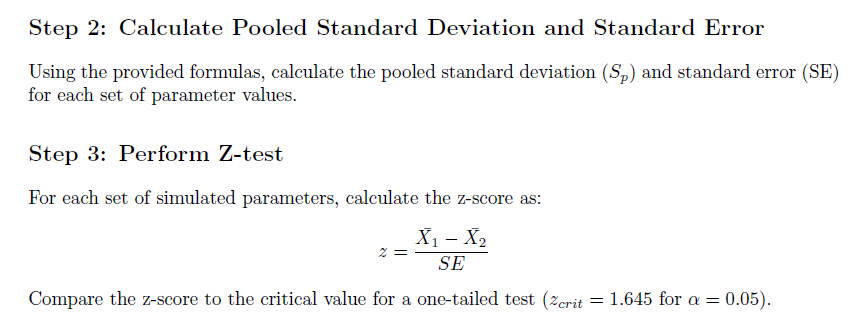

## INITIALIZATION OF THE DEFAULT PARAMETERS

In [3]:
import numpy as np

# Example: Simulate for specific values
mean_score_cheatsheet = 88
mean_score_no_cheatsheet = 85
std_cheatsheet = 3
std_no_cheatsheet = 2
initial_sample_size_cheat_sheet = 45
initial_no_sample_size_cheat_sheet = 55

#### calculating z-score and p-value

In [9]:
# Calculate the pooled standard deviation
pooled_variance = ((initial_sample_size_cheat_sheet - 1) * std_cheatsheet**2 + (initial_no_sample_size_cheat_sheet - 1) * std_no_cheatsheet**2) / (initial_sample_size_cheat_sheet + initial_no_sample_size_cheat_sheet - 2)
pooled_std = np.sqrt(pooled_variance)
print(f"Pooled standard deviation: {pooled_std}")

# Calculate the standard error
standard_error = pooled_std * np.sqrt(1 / initial_sample_size_cheat_sheet + 1 / initial_no_sample_size_cheat_sheet)
print(f"Standard error: {standard_error}")

# Calculate the z-score
z_score = (mean_score_cheatsheet - mean_score_no_cheatsheet) / standard_error

# Calculate the p-value for a one tailed test
p_value = stats.norm.cdf(z_score)

print(f"Z-score: {z_score}, P-value: {p_value}")

Pooled standard deviation: 2.498979383505129
Standard error: 0.5023137559951615
Z-score: 5.972362819442471, P-value: 0.9999999988307913


Z-score of 5.9723 tells that that there is a 1.2 magnitude difference in performance relative to pooled variance in data.

## Step 3: Perform Z-test
For each set of simulated parameters, calculate the z-score as, Compare the z-score to the critical value for a one-tailed test (zcrit = 1.645 for α = 0.05).

## Step 4: Compare Z-score to Critical Value

For a one-tailed test with a significance level of α = 0.05, the critical value (zcrit) is 1.645. We compare the calculated z-score to this critical value to determine if we reject the null hypothesis.

- **Z-score (calculated):** 10.874361055604869
- **Critical value (zcrit):** 1.645

Since the calculated z-score is greater than the critical value, we reject the null hypothesis. This indicates that there is a statistically significant difference between the two groups.


## Step 4: Plot Results Using Bar Plots

Plot the z-scores and p-values as the parameters vary. Use interactive sliders to dynamically adjust
the mean, standard deviation, and sample size.

We are going to run a simulation for different values and plot a graph

Step 4: Plot Results Using Bar Plots
Plot the z-scores and p-values as the parameters vary. Use interactive sliders to dynamically adjust
the mean, standard deviation, and sample size.

In [8]:
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np

import matplotlib.pyplot as plt

# Define the simulation function
def simulation(std_cheatsheet, std_no_cheatsheet, mean_cheatsheet, mean_no_cheatsheet, sample_size_cheatsheet, sample_size_no_cheatsheet):
    # Calculate the pooled standard deviation
    pooled_variance = ((sample_size_cheatsheet - 1) * std_cheatsheet**2 + (sample_size_no_cheatsheet - 1) * std_no_cheatsheet**2) / (sample_size_cheatsheet + sample_size_no_cheatsheet - 2)
    pooled_std = np.sqrt(pooled_variance)

    # Calculate the standard error
    standard_error = pooled_std * np.sqrt(1 / sample_size_cheatsheet + 1 / sample_size_no_cheatsheet)

    # Calculate the z-score
    z_score = (mean_cheatsheet - mean_no_cheatsheet) / standard_error

    # Calculate the p-value for a one tailed test
    p_value = stats.norm.cdf(z_score)

    return z_score, p_value 

# Define the plotting function
def plot_simulation(mean_cheatsheet, mean_no_cheatsheet, std_cheatsheet, std_no_cheatsheet, sample_size_cheatsheet, sample_size_no_cheatsheet):
    z_score, p_value = simulation(std_cheatsheet, std_no_cheatsheet, mean_cheatsheet, mean_no_cheatsheet, sample_size_cheatsheet, sample_size_no_cheatsheet)
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    ax[0].bar(['Z-score'], [z_score], color='blue')
    ax[0].set_ylim([0, 10])
    ax[0].set_title('Z-score')
    
    ax[1].bar(['P-value'], [p_value], color='red')
    ax[1].set_ylim([0, 1])
    ax[1].set_title('P-value')
    
    plt.show()

# Create interactive sliders
interact(plot_simulation,
         mean_cheatsheet=widgets.FloatSlider(min=85, max=95, step=1, value=88, description='Mean Cheat Sheet'),
         mean_no_cheatsheet=widgets.FloatSlider(min=80, max=90, step=1, value=85, description='Mean No Cheat Sheet'),
         std_cheatsheet=widgets.FloatSlider(min=1, max=5, step=0.1, value=3, description='Std Cheat Sheet'),
         std_no_cheatsheet=widgets.FloatSlider(min=1, max=5, step=0.1, value=2, description='Std No Cheat Sheet'),
         sample_size_cheatsheet=widgets.IntSlider(min=20, max=200, step=10, value=45, description='Sample Size Cheat Sheet'),
         sample_size_no_cheatsheet=widgets.IntSlider(min=20, max=200, step=10, value=55, description='Sample Size No Cheat Sheet'))

interactive(children=(FloatSlider(value=88.0, description='Mean Cheat Sheet', max=95.0, min=85.0, step=1.0), F…

<function __main__.plot_simulation(mean_cheatsheet, mean_no_cheatsheet, std_cheatsheet, std_no_cheatsheet, sample_size_cheatsheet, sample_size_no_cheatsheet)>